<a href="https://colab.research.google.com/github/anm4r/datasets/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
abalone_data = pd.read_csv(
    'https://raw.githubusercontent.com/anm4r/datasets/main/abalone.csv'
)

# Librerias + funciones

In [66]:
# ver la calidad de los datos
from sklearn.feature_selection import mutual_info_regression
# split data
from sklearn.model_selection import train_test_split
# preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# models
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# medidas
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import cross_val_score
# visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [5]:
#funciones
def stand_columns (data):
  data = data.rename(
    columns = lambda x : x.lower().replace(' ','_').replace('.','_')
  )
  data.set_index('id', inplace=True)
  return data


def onehot (data, columna):
  data[columna+'_F'] = data[columna].apply(lambda x: 1 if x == 'F' else 0)
  data[columna+'_M'] = data[columna].apply(lambda x: 1 if x == 'M' else 0)
  data[columna+'_I'] = data[columna].apply(lambda x: 1 if x == 'I' else 0)
  data.drop(columns = columna, inplace = True)
  return data

 # GRaficas

In [6]:
df = abalone_data.copy()
df = stand_columns(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             90615 non-null  object 
 1   length          90615 non-null  float64
 2   diameter        90615 non-null  float64
 3   height          90615 non-null  float64
 4   whole_weight    90615 non-null  float64
 5   whole_weight_1  90615 non-null  float64
 6   whole_weight_2  90615 non-null  float64
 7   shell_weight    90615 non-null  float64
 8   rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [22]:
df.describe()

,length,diameter,height,whole_weight,whole_weight_1,whole_weight_2,shell_weight,rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


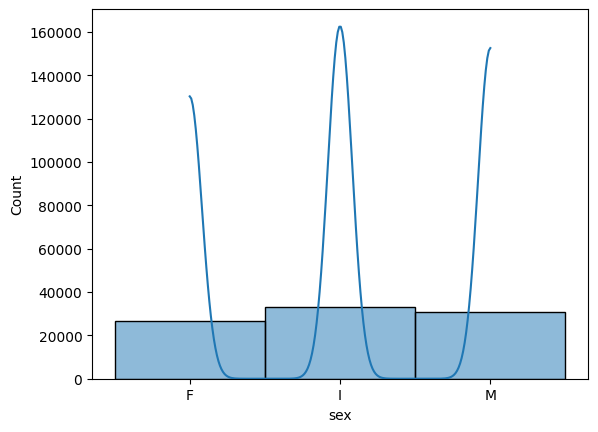

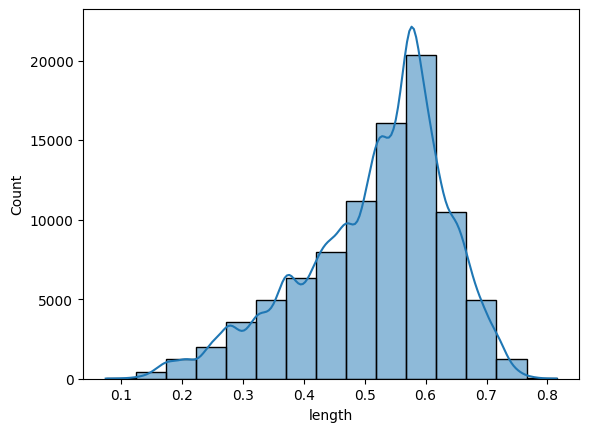

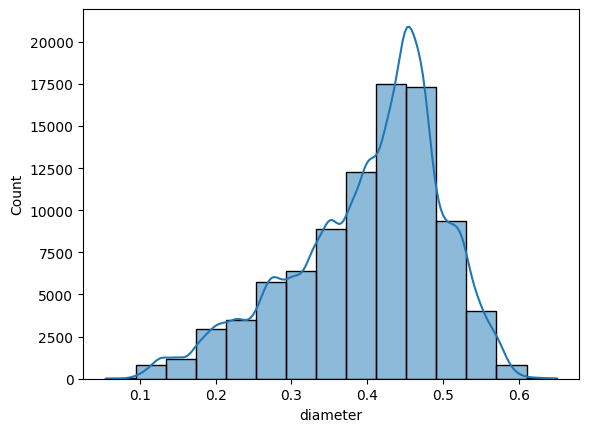

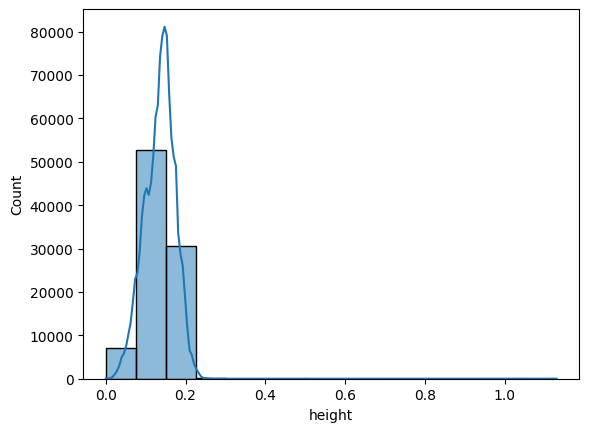

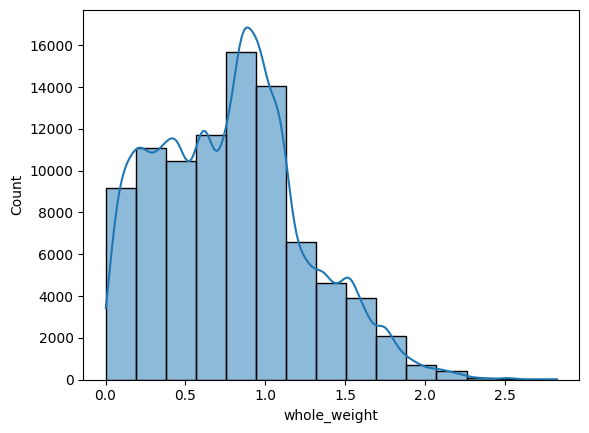

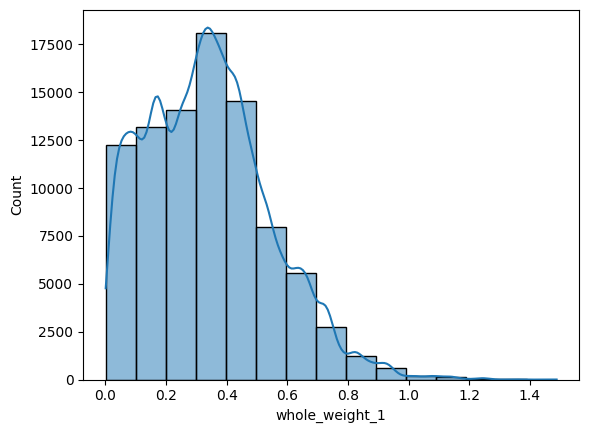

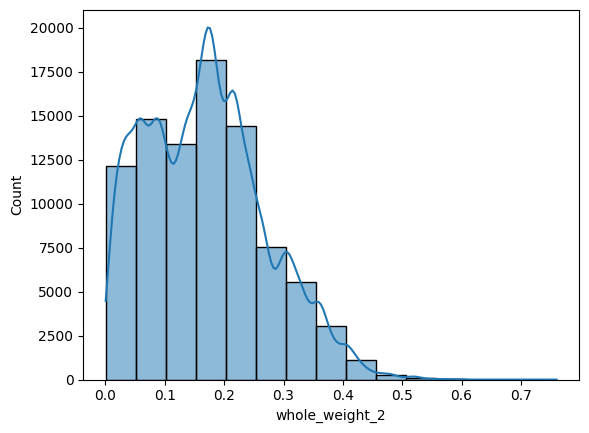

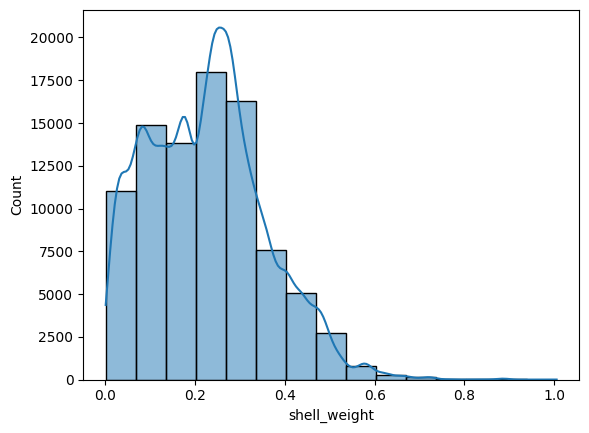

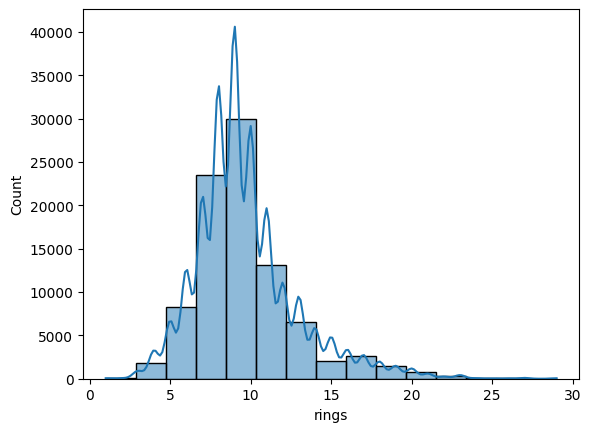

In [12]:
columns = df.columns
for column in columns:
  sns.histplot(data = df, x = column, bins = 15, kde = True)
  plt.show()

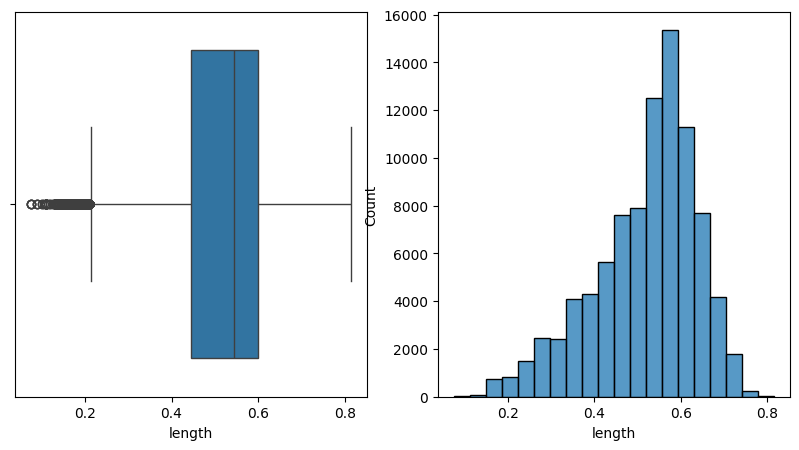

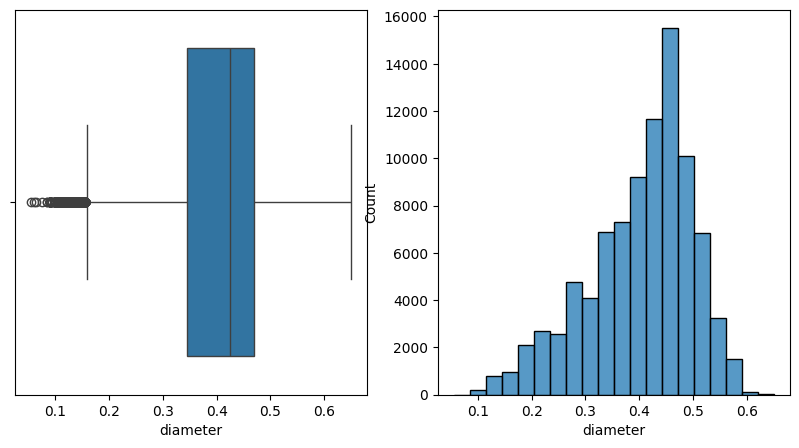

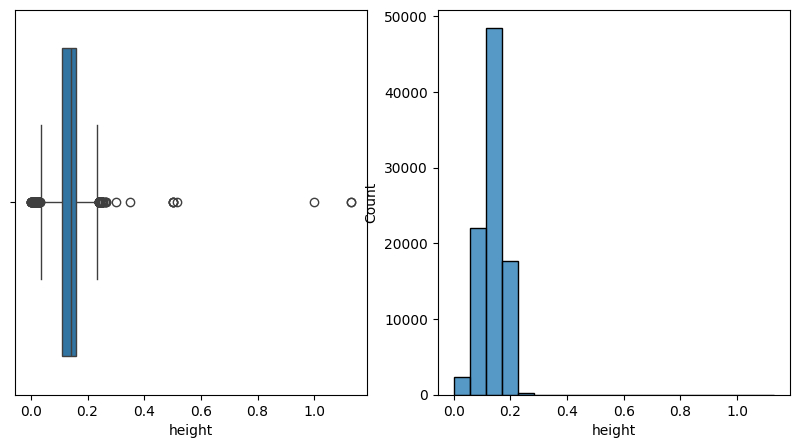

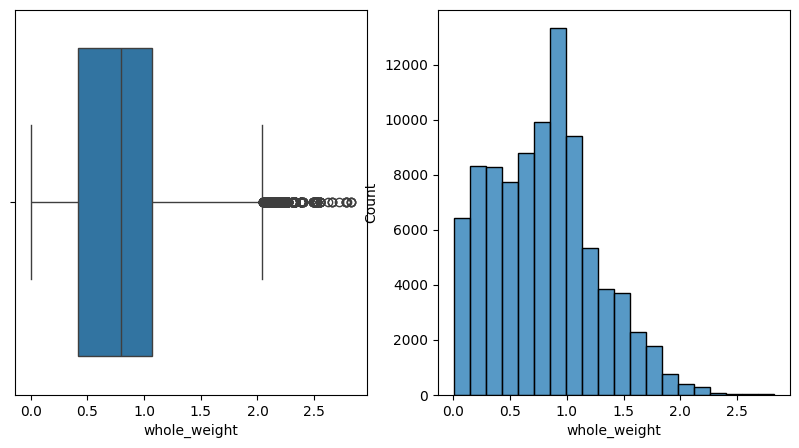

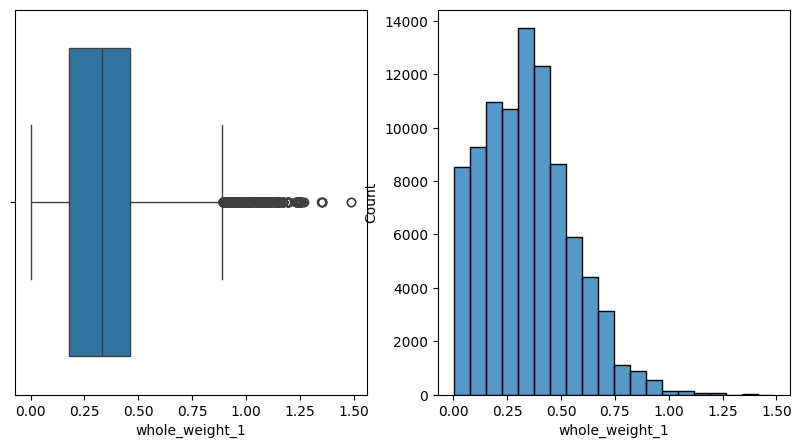

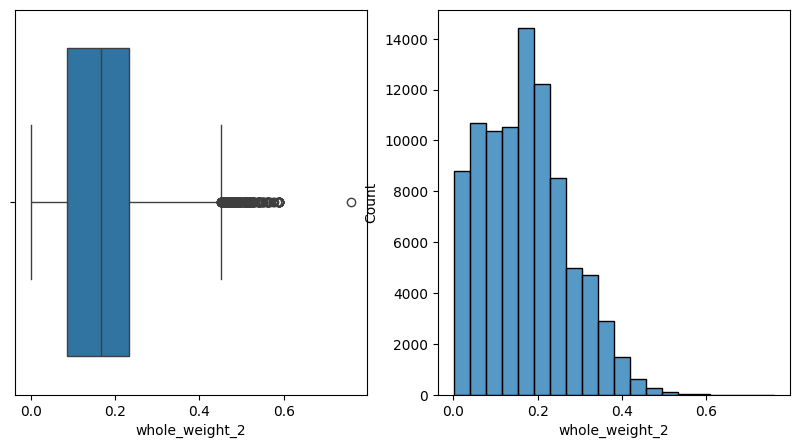

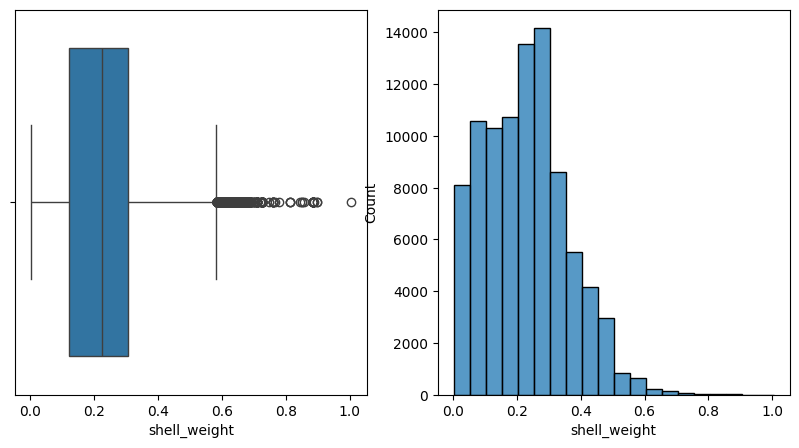

In [19]:
df_drop = df.drop(columns = ['sex', 'rings'])
columns = df_drop.columns
for column in columns:
  fig, axis = plt.subplots(ncols=2, figsize=(10,5))
  sns.boxplot(data = df_drop, x = column, ax = axis[0])
  sns.histplot(data = df_drop, x = column, bins = 20, ax = axis[1])
  plt.show()

In [42]:
df_no = df[df.height < 0.8]
df_no = df_no[df_no.whole_weight_1 < 1.4]

# Pruebas

In [ ]:
df = abalone_data.copy()
df = stand_columns(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             90615 non-null  object 
 1   length          90615 non-null  float64
 2   diameter        90615 non-null  float64
 3   height          90615 non-null  float64
 4   whole_weight    90615 non-null  float64
 5   whole_weight_1  90615 non-null  float64
 6   whole_weight_2  90615 non-null  float64
 7   shell_weight    90615 non-null  float64
 8   rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [ ]:
import scipy.stats
scipy.stats

In [ ]:
'''
Tienen los machos diferente cantidad de anillos que las hembras ?
Establecermos las hipotesis:
  Ho: u machos = u hembras
  H1: u machos != u hembras
  Nivel de significancia : alfa = 0.05
'''
import scipy.stats

# Quitando infantes
df_fm = df[(df['sex'] == 'F') | (df['sex'] == 'M')]

# calculando p-value con t student
result = scipy.stats.ttest_ind(df[df['sex']=='M']['rings'],
                      df[df['sex']=='F']['rings'])
print(result)

# Medias de poblaciones
media_m = df[df['sex']=='M']['rings'].mean()
media_f = df[df['sex']=='F']['rings'].mean()
print(f'Media machos: {media_m}; Media hembras: {media_f}')

TtestResult(statistic=-16.26080316782865, pvalue=2.541099279962489e-59, df=57520.0)
Media machos: 10.753408321784253; Media hembras: 11.161388941309681


Al tener un p-value mucho menor que alfa, es decir la proabilidad que de nuestras mediciones sean las que obtuvimos (medias de los machos y hembras) dado que nuestra hipotesis nula es cierta (mismas medias) es muy baja (p<0.0...2..), y en comparacion con nuestro nivel de significancia (p<<alfa) por ende tenemos evidencias para poder rechazar la hipotesis nula y aceptar la alternativa, donde nos dice que las media de los anillos son diferentes para machos y hembras

# Usando XGBoost

In [ ]:
abalone_train = stand_columns(abalone_data.copy())

## Mutual Info Regression

In [ ]:
m_info = mutual_info_regression(
    abalone_train.drop(columns=['sex','rings']),
    abalone_train['rings']
)

In [ ]:
m_info_df = pd.DataFrame({
    'Variables': abalone_train.drop(columns=['sex','rings']).columns,
    'Mutual Info': m_info
})
m_info_df

,Variables,Mutual Info
0,length,0.531232
1,diameter,0.542544
2,height,0.554928
3,whole_weight,0.576013
4,whole_weight_1,0.512390
5,whole_weight_2,0.548519
6,shell_weight,0.676771


## Modelo

In [52]:
# a_train = onehot(abalone_train.copy(), 'sex')
a_train = onehot(df_no.copy(), 'sex')

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(
    a_train.drop(columns='rings'), a_train['rings'], test_size = 0.1
)

In [ ]:
# param_grid={
#     'learning_rate':np.arange(0.03,0.08,0.005),
#     'n_estimators':np.arange(300,800,50),
#     'max_depth' : np.arange(3,8,1)
# }
# xgb = XGBRegressor()
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     scoring = 'neg_mean_squared_log_error'
#   )
# grid_search.fit(X_train, y_train)

# print("Mejores parámetros:", grid_search.best_params_)
# best_params = grid_search.best_params_

In [70]:
scoring = make_scorer(mean_squared_log_error, greater_is_better=False)

param_grid={
    # 'learning_rate':np.arange(0.04,0.05,0.005),
    # 'n_estimators':np.arange(750,850,50),
    # 'max_depth' : np.arange(6,7,1)
    'learning_rate' :[0.03, 0.04, 0.05],
    'n_estimators' : [700, 750, 800],
    'max_depth' : [5, 6, 7]
}
xgb = XGBRegressor()
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    verbose=2,
    scoring = scoring
  )
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", grid_search.best_params_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Mejores parámetros: {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 800}


In [68]:
# best_params = {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 750}

xgb_best = XGBRegressor(**best_params)
xgb_best.fit(X_train, y_train)

y_predx = xgb_best.predict(X_valid)
msle = mean_squared_log_error(y_valid, y_predx, squared = False)
print(f'Medida : {msle}')

Medida : 0.14804492690576176


In [ ]:
'''
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'learning_rate': 0.039999999999999994, 'max_depth': 6, 'n_estimators': 400}
Medida : 0.14947795727093974

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros: {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 450}
Medida : 0.14948687283006143

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'learning_rate': 0.045, 'max_depth': 5, 'n_estimators': 550}
Medida : 0.1494756144645602

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Mejores parámetros: {'learning_rate': 0.039999999999999994, 'max_depth': 5, 'n_estimators': 750}
Medida : 0.15002432026031964
'''

In [61]:
# Otras Medidas
mae = mean_absolute_error(y_valid, y_predx)
print(f'El MAE es: {mae}')
mse = mean_squared_error(y_valid, y_predx)
print(f'El MSE es: {mse}')
r2 = r2_score(y_valid, y_predx)
print(f'El r2 es: {r2}')

El MAE es: 1.2300371529053227
El MSE es: 3.3622740620771183
El r2 es: 0.670472628628247


<Axes: xlabel='y_real', ylabel='y_predx'>

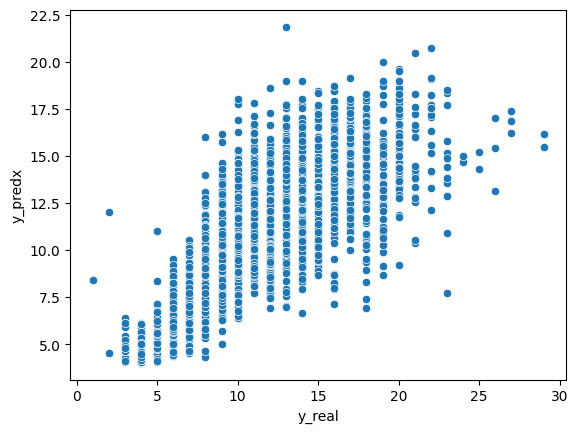

In [62]:
comparation = pd.DataFrame({'y_real':y_valid.values,'y_predx':y_predx})
sns.scatterplot(data = comparation, x = 'y_real', y = 'y_predx')

## Exportacion de predicciones con test data

In [ ]:
# Importar datos de testeo
abalone_test = pd.read_csv('/content/test.csv')
# Aplicar transformaciones
abalone_test = stand_columns(abalone_test)
abalone_test = onehot(abalone_test, 'sex')

In [ ]:
# Entrenar el modelo con todos los datos de entrenamiento
xgb_final = XGBRegressor(**best_params)
xgb_final.fit(
    a_train.drop(columns=['rings']),
    a_train['rings']
)
# Prediccion con la data de testeo
pred_final = xgb_final.predict(abalone_test)

In [ ]:
# Exportación de resultados
submission = pd.DataFrame({
    'id': abalone_test.index,
    'Rings': pred_final
})
submission.to_csv('sub_xgb.csv', index = False)